## Libraries

In [1]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist #dataset clasico
#keras es amigable

## Input reconstructed

In [2]:
#nosotros tenemos que construir la red
encoding_dim = 32 #dimension de la salidad de la red y entrada de otra long de vector latente

input_img = keras.Input(shape=(784,)) #definimos el input los pixeles son de 28x28 

#se tienen dos redes
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
#definicmos la dimension y el tamaño de vector
decoded = layers.Dense(784, activation='sigmoid')(encoded)
#salida de 28 x 28
#red entera
autoencoder = keras.Model(input_img, decoded)

In [3]:
encoder = keras.Model(input_img, encoded) #generamos el modelo

In [4]:

encoded_input = keras.Input(shape=(encoding_dim,))
# ultima capa modelo autoencoder
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#definimos la funcion de perdida y el optimizados

In [6]:
#se optiene de keras el conjunto de entrenamiento y prueba
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255. #normalizamos
x_test = x_test.astype('float32') / 255.

In [8]:
x_train #se acomoda como una imagen de 28x28

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
len(x_train)

60000

In [11]:
np.prod(x_train.shape[1:])

784

In [12]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [13]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
#Ajustamos nuestras redes
#La y es el conjunto de entrenamiento ya que queremos que se reconozca a si mismo
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2751 - val_loss: 0.1867
Epoch 2/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1690 - val_loss: 0.1528
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1438 - val_loss: 0.1335
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1282 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1178 - val_loss: 0.1124
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1106 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1055 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0972 - val_loss: 0.0953

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
#La salida de una red es la entrada de la otra

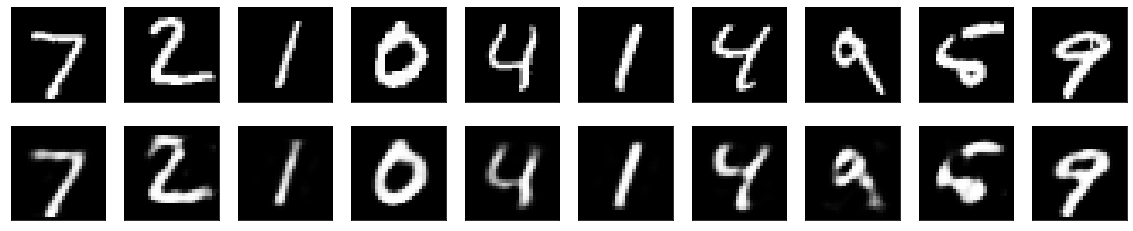

In [18]:

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    #original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruccion
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Denoising Image

In [19]:
#Para imagines que tienen ruido para poder quitarlo
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
#se agrega un factor de ruido
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

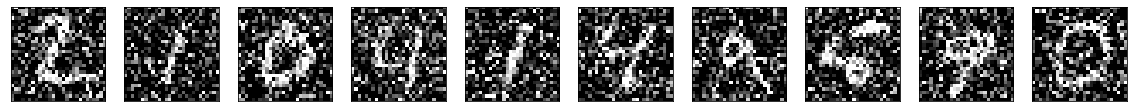

In [20]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#visualizacion de ruido con factor

In [21]:
input_img = keras.Input(shape=(28, 28, 1))

#Transformaciones a las imagenes
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)



x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
#Necesitamos un conjunto de datos y la target que es el dataset sin ruido
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                validation_data=(x_test_noisy, x_test),)

Epoch 1/20
469/469 [==============================] - 73s 155ms/step - loss: 0.1734 - val_loss: 0.1172
Epoch 2/20
469/469 [==============================] - 73s 156ms/step - loss: 0.1137 - val_loss: 0.1080
Epoch 3/20
469/469 [==============================] - 74s 157ms/step - loss: 0.1069 - val_loss: 0.1039
Epoch 4/20
469/469 [==============================] - 73s 156ms/step - loss: 0.1039 - val_loss: 0.1017
Epoch 5/20
469/469 [==============================] - 74s 157ms/step - loss: 0.1020 - val_loss: 0.1008
Epoch 6/20
469/469 [==============================] - 74s 158ms/step - loss: 0.1008 - val_loss: 0.0993
Epoch 7/20
469/469 [==============================] - 74s 158ms/step - loss: 0.0999 - val_loss: 0.0989
Epoch 8/20
469/469 [==============================] - 74s 158ms/step - loss: 0.0992 - val_loss: 0.0980
Epoch 9/20
469/469 [==============================] - 74s 157ms/step - loss: 0.0987 - val_loss: 0.0977
Epoch 10/20
469/469 [==============================] - 74s 158ms/step - l

In [23]:
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

In [24]:
decoded_imgs_noisy.shape


(10000, 28, 28, 1)

In [25]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

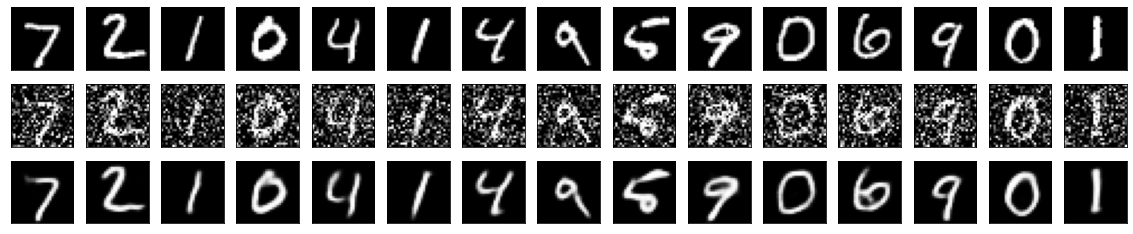

In [27]:

n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Ruido
    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruccion
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()